In [1]:
# 이미지 처리에 필요한 라이브러리(도서관, 책)입니다
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 로드합니다
def read_file(filename):
  img = cv2.imread(filename)
  # 이미지 색깔을 파랑, 초록, 빨강에서 빨강, 초록, 파랑으로 바꿉니다
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # 이미지를 보여줍니다
  plt.imshow(img)
  plt.show()
  return img

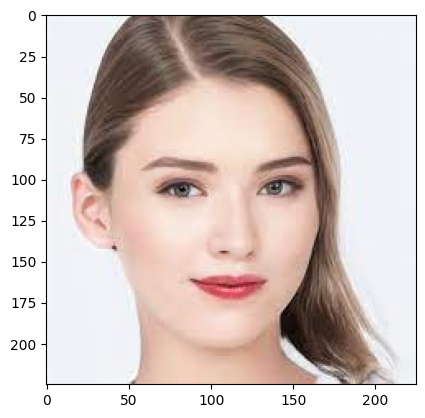

In [2]:
# 파일을 읽고 확인해봅니다
img = read_file("lady.jpeg")

In [3]:
# 테두리 선을 만듭니다
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)    # 이미지의 노이즈를 줄이는데 사용됨

  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY, line_size, blur_value)
  # 이미지의 임계값을 적응적으로 계산하여 이진 이미지를 생성하는데 사용됨

  return edges

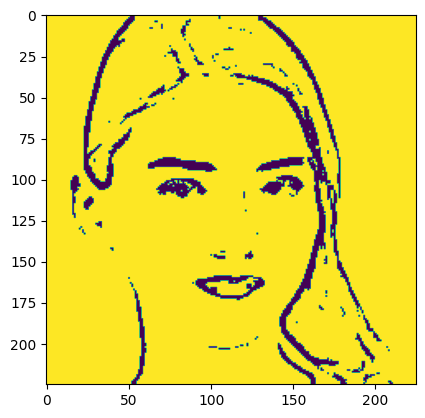

In [4]:
line_size = 7
blur_value = 7
edges = edge_mask(img, line_size, blur_value)

# 이미지를 보여줍니다
plt.imshow(edges)
plt.show()

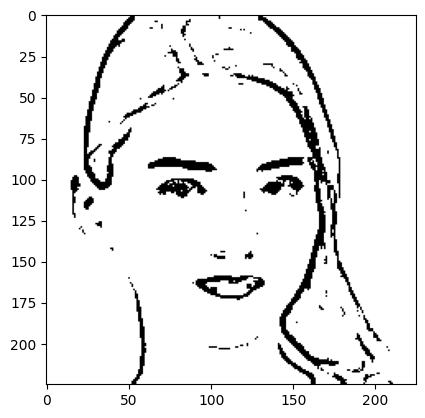

In [5]:
# 색상(color map, cmap)을 회색으로 바꿉니다
plt.imshow(edges, cmap = "gray")
plt.show()

In [6]:
# 색상 수를 줄여 만화처럼 만듭니다
def color_quantization(img, k):
  # 이미지 색을 가져오기 위해 변형합니다
  # 각 픽셀의 3가지 색상 표현
  data = np.float32(img).reshape((-1, 3))

  # K-평균 알고리즘
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

  # k 평균을 구합니다(가장 많이 사용되는 k색 가져오기)
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)

  result = center[label.flatten()]
  result = result.reshape(img.shape)

  return result

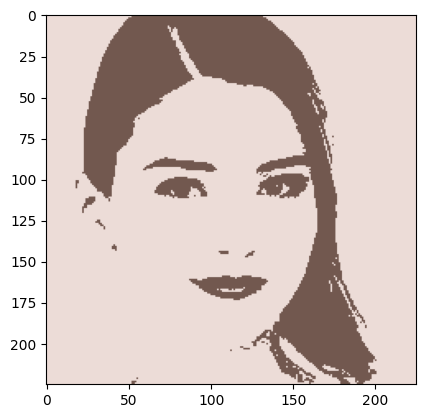

In [7]:
img_quant = color_quantization(img, k=2)

plt.imshow(img_quant)
plt.show()

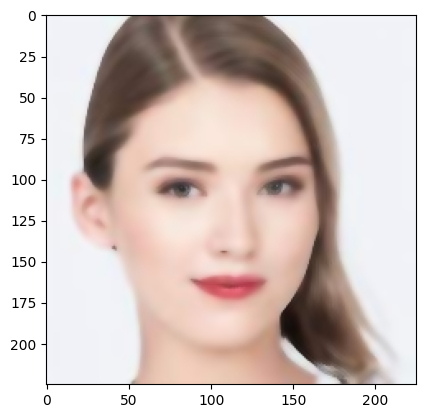

In [8]:
# 자잘한 점(noise)를 지웁니다

blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200, sigmaSpace=200)

plt.imshow(blurred)
plt.show()

In [9]:
# 테두리 선과 그림을 합칩니다
def cartoon(img):
  # 색을 줄입니다
  k = 10 # 색의 개수
  img_quant = color_quantization(img, k)
  # 자잘한 부분을 지웁니다
  blurred = cv2.bilateralFilter(img_quant, d=7, sigmaColor=200, sigmaSpace=200)

  # 테두리를 만듭니다
  line_size = 7
  blur_value = 7
  edges = edge_mask(img, line_size, blur_value)

  img_cartoon = cv2.bitwise_and(blurred, blurred, mask = edges)
  plt.imshow(img_cartoon)
  plt.show()

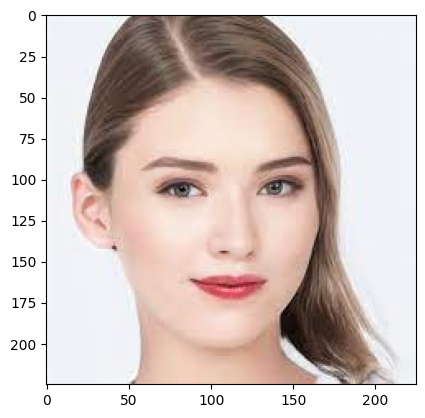

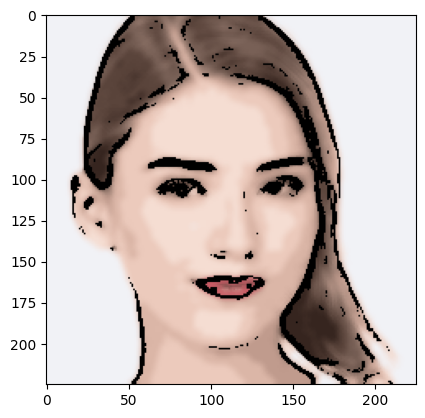

In [10]:
# 원래 이미지
plt.imshow(img)
plt.show()

# 만화 이미지
cartoon(img)